In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


p = Path("C:/Users/k/Desktop/GitHub/GPS_transport/")

segments = pd.read_csv(p / "input_data" / "python" / "segments.csv")
markers = pd.read_csv(p / "input_data" / "python" / "markers.csv")
aug_data = pd.read_hdf(p / "processed_data" / "aug_all.h5", key="aug")

In [2]:
segments.set_index("segment_id",inplace=True)

print(aug_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26256331 entries, 0 to 533347
Data columns (total 11 columns):
 #   Column      Dtype          
---  ------      -----          
 0   segment_id  uint16         
 1   aug_time    datetime64[ns] 
 2   aug_type    uint8          
 3   arac_id     object         
 4   route_id    uint16         
 5   lat         float64        
 6   lon         float64        
 7   dir         uint8          
 8   speed       float64        
 9   time_diff   timedelta64[ns]
 10  space_diff  float64        
dtypes: datetime64[ns](1), float64(4), object(1), timedelta64[ns](1), uint16(2), uint8(2)
memory usage: 1.7+ GB
None


In [3]:
(aug_data["dir"] == 1).sum()

13346283

In [4]:
aug_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26256331 entries, 0 to 533347
Data columns (total 11 columns):
 #   Column      Dtype          
---  ------      -----          
 0   segment_id  uint16         
 1   aug_time    datetime64[ns] 
 2   aug_type    uint8          
 3   arac_id     object         
 4   route_id    uint16         
 5   lat         float64        
 6   lon         float64        
 7   dir         uint8          
 8   speed       float64        
 9   time_diff   timedelta64[ns]
 10  space_diff  float64        
dtypes: datetime64[ns](1), float64(4), object(1), timedelta64[ns](1), uint16(2), uint8(2)
memory usage: 1.7+ GB


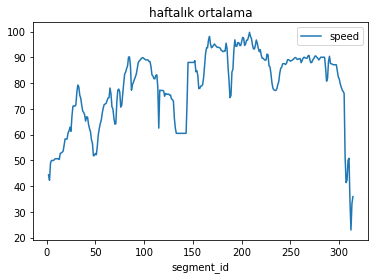

In [5]:
aug_data.loc[aug_data["dir"] == 1, ["segment_id", "speed"]].groupby(["segment_id"]).mean(["speed"]).plot(
    kind="line", use_index=True, y="speed")
plt.title("haftalık ortalama")
plt.show()

In [12]:
print(aug_data["speed"].max())
print(aug_data["speed"].min())

print(aug_data["speed"].argmax())

print(aug_data[aug_data["arac_id"] == aug_data.iloc[aug_data["speed"].argmax()]["arac_id"]].to_string())

199.7959770816437
0.0184922490762691
20897954
        segment_id                      aug_time  aug_type  arac_id  route_id        lat        lon  dir       speed                 time_diff  space_diff
201032        1003 2019-12-03 16:08:10.906292915         1  7whhkpp         0  39.575878  32.144594    2   25.346531 0 days 00:00:02.996395200    0.021097
201033        1004 2019-12-03 16:08:13.902689457         2  7whhkpp         0  39.575974  32.144807    2   23.019852 0 days 00:00:05.177779200    0.033109
201034        1005 2019-12-03 16:08:19.080469131         1  7whhkpp         0  39.576124  32.145140    2   23.768597 0 days 00:00:15.380323200    0.101547
201035        1006 2019-12-03 16:08:34.460792542         2  7whhkpp         0  39.576646  32.146113    2   24.628565    0 days 00:01:01.298838    0.419362
201036        1007 2019-12-03 16:09:35.759629250         2  7whhkpp         0  39.578524  32.150355    2   24.628569 0 days 00:00:01.909094400    0.013061
201037        1008 2019-

# arac_id = 7whhkpp
# tarih 2019-12-25
### augmentation'da problem olabilir mi ?
### aug_type = 2 'lerde sıkıntı olabilir?
$$ c = \sqrt(a^2 + b^2) $$

### My Great Heading {#12}



